In [2]:
#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#### Load Datasets

In [3]:
# Load the Titanic train and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
test_ids=test_data["PassengerId"]

In [4]:
# Display the first few rows of each dataset
print("Train Data:")
train_data.head(10)

Train Data:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Display the first few rows of each dataset
print("\nTest Data:")
test_data.head(10)


Test Data:


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


#### Explore Dataset Info

In [6]:
# Display information about the datasets
print("Train Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId

#### Summary Statistics

In [7]:
# Display summary statistics for numerical features in the training dataset
print("Summary Statistics - Train Data:")
print(train_data.describe())

# Display summary statistics for numerical features in the test dataset
print("\nSummary Statistics - Test Data:")
print(test_data.describe())


Summary Statistics - Train Data:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary Statistics - Test Data:
       Passenge

#### Visualize Data Distributions

C:\Users\ahish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ahish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\ahish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping 

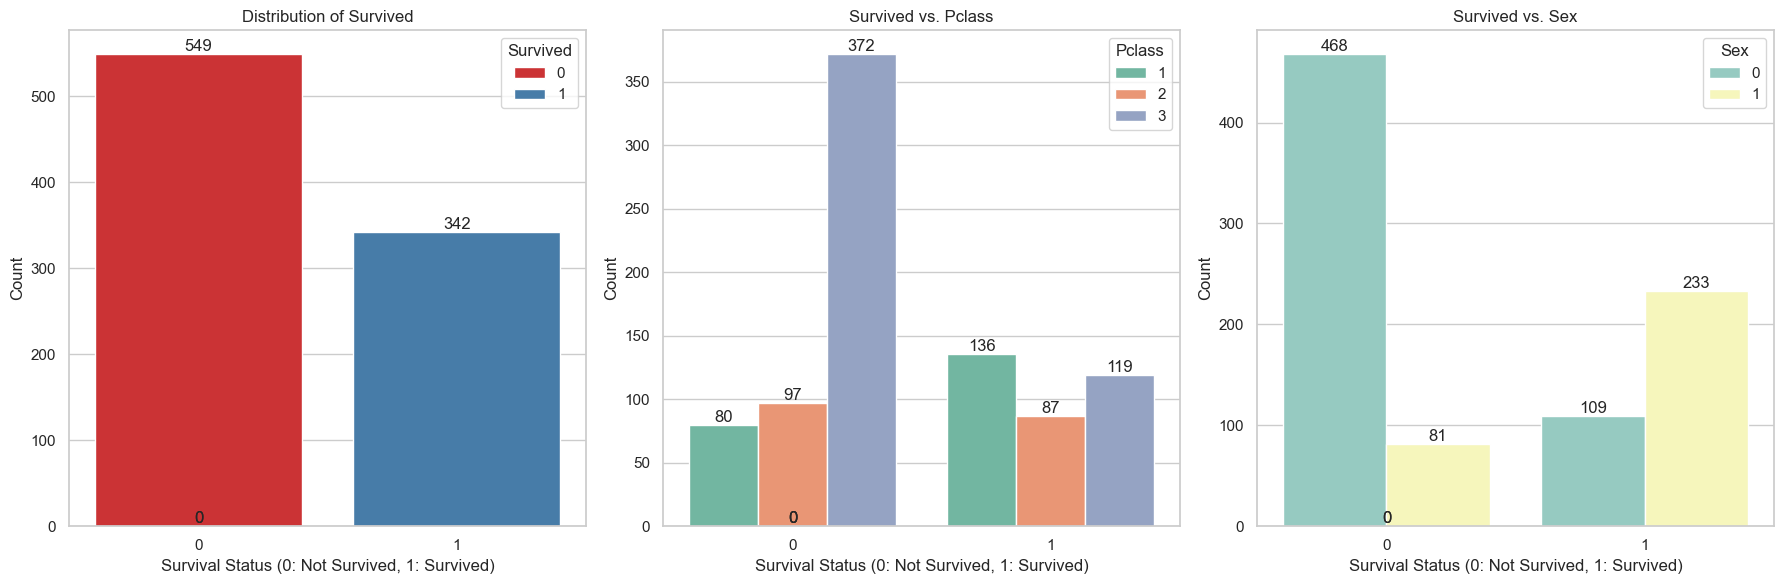

In [14]:
# Set up Seaborn for better visualization
sns.set(style="whitegrid")

# Create a 1x3 grid of subplots

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Visualize the distribution of 'Survived' in the training dataset
sns.countplot(x='Survived', data=train_data, palette='Set1', hue='Survived', ax=axes[0])
axes[0].set_title('Distribution of Survived')
axes[0].set_xlabel('Survival Status (0: Not Survived, 1: Survived)')
axes[0].set_ylabel('Count')


# Annotate each bar with the exact number
for rect in axes[0].patches:
    height = rect.get_height()
    axes[0].text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Visualize the distribution of 'Survived' in the training dataset for each 'Pclass'
sns.countplot(x='Survived', data=train_data, palette='Set2', hue='Pclass', ax=axes[1])
axes[1].set_title('Survived vs. Pclass')
axes[1].set_xlabel('Survival Status (0: Not Survived, 1: Survived)')
axes[1].set_ylabel('Count')

# Annotate each bar with the exact number
for rect in axes[1].patches:
    height = rect.get_height()
    axes[1].text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Visualize the distribution of 'Survived' in the training dataset for each 'Sex'
sns.countplot(x='Survived', data=train_data, palette='Set3', hue='Sex', ax=axes[2])
axes[2].set_title('Survived vs. Sex')
axes[2].set_xlabel('Survival Status (0: Not Survived, 1: Survived)')
axes[2].set_ylabel('Count')

# Annotate each bar with the exact number
for rect in axes[2].patches:
    height = rect.get_height()
    axes[2].text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.show()


#### Distribution of Ages of All People in the Ship

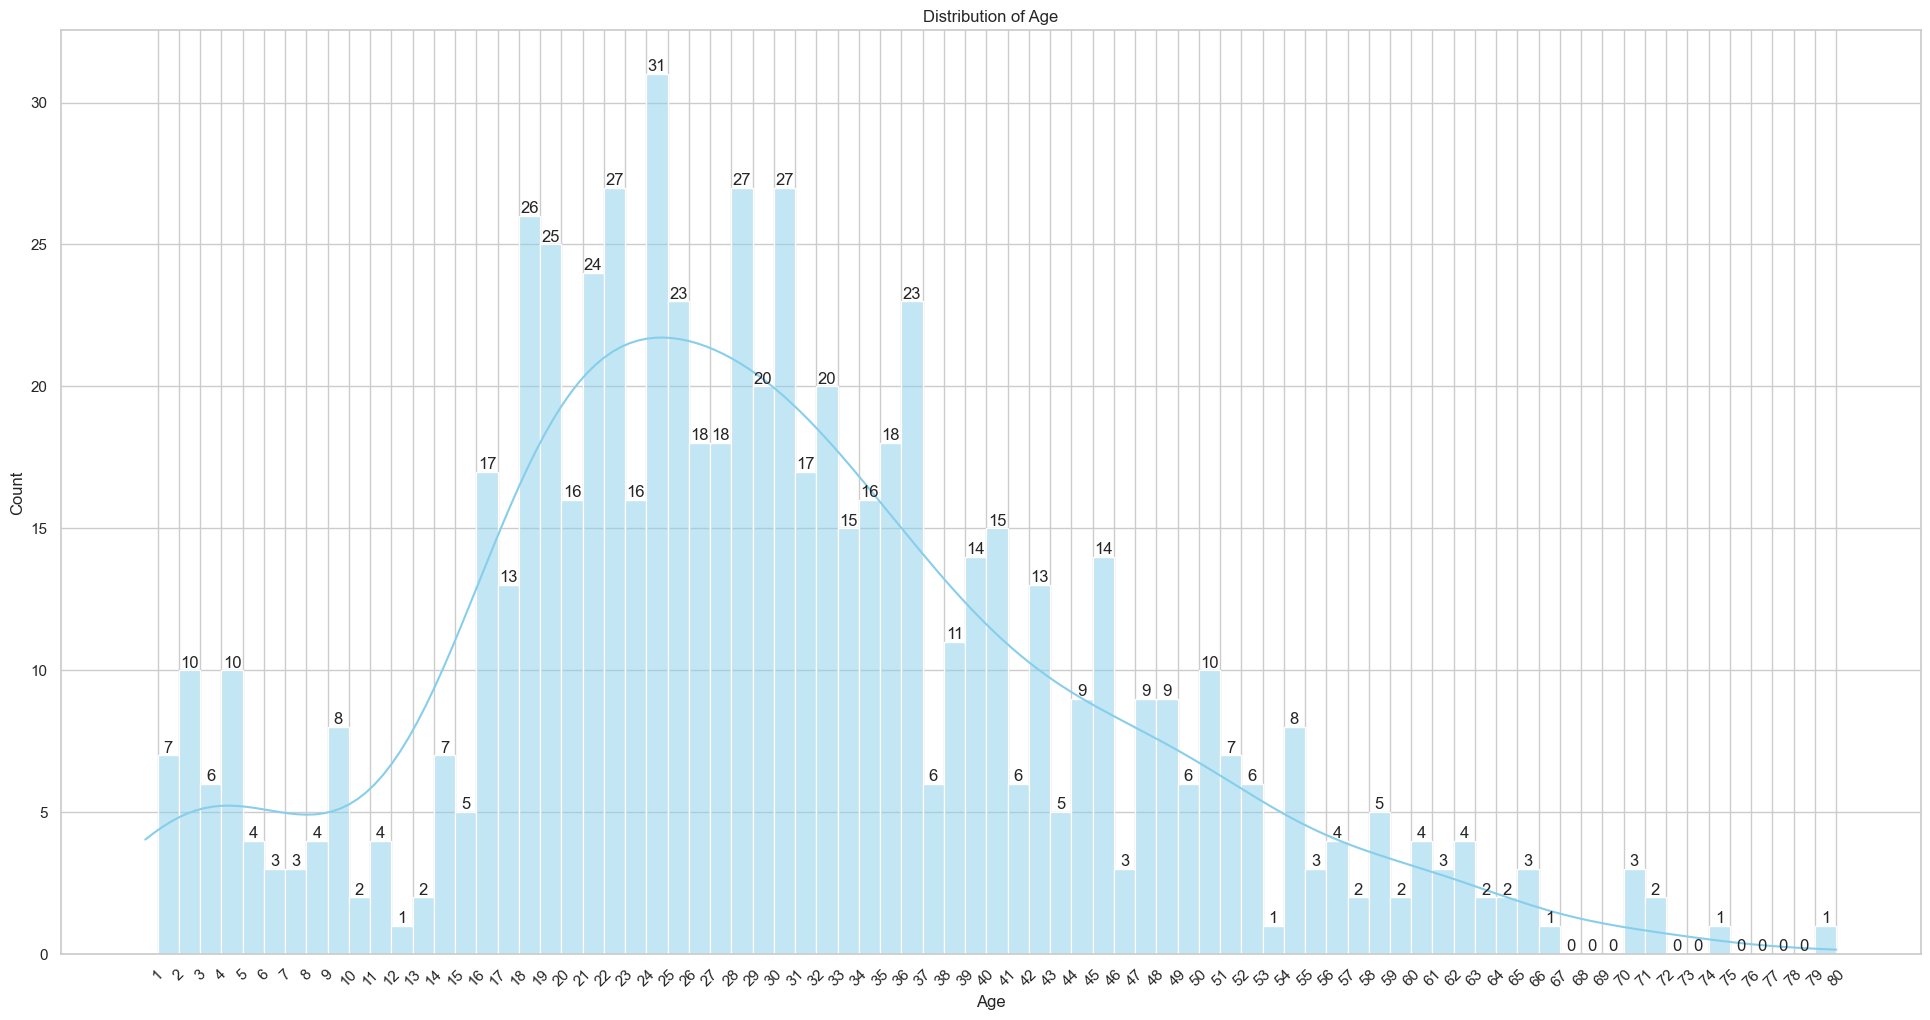

In [9]:
# Set up Seaborn for better visualization
sns.set(style="whitegrid")

# Visualize the distribution of 'Age' in the training dataset
plt.figure(figsize=(24, 12))
ax = sns.histplot(train_data['Age'].dropna(), kde=True, bins=range(1, 81), color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Annotate each bin with the exact number
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Set x-axis ticks to show every individual year and rotate them at a 45-degree angle
plt.xticks(ticks=range(1, 81), rotation=45)

plt.show()


#### Distribution of Age for Survivors

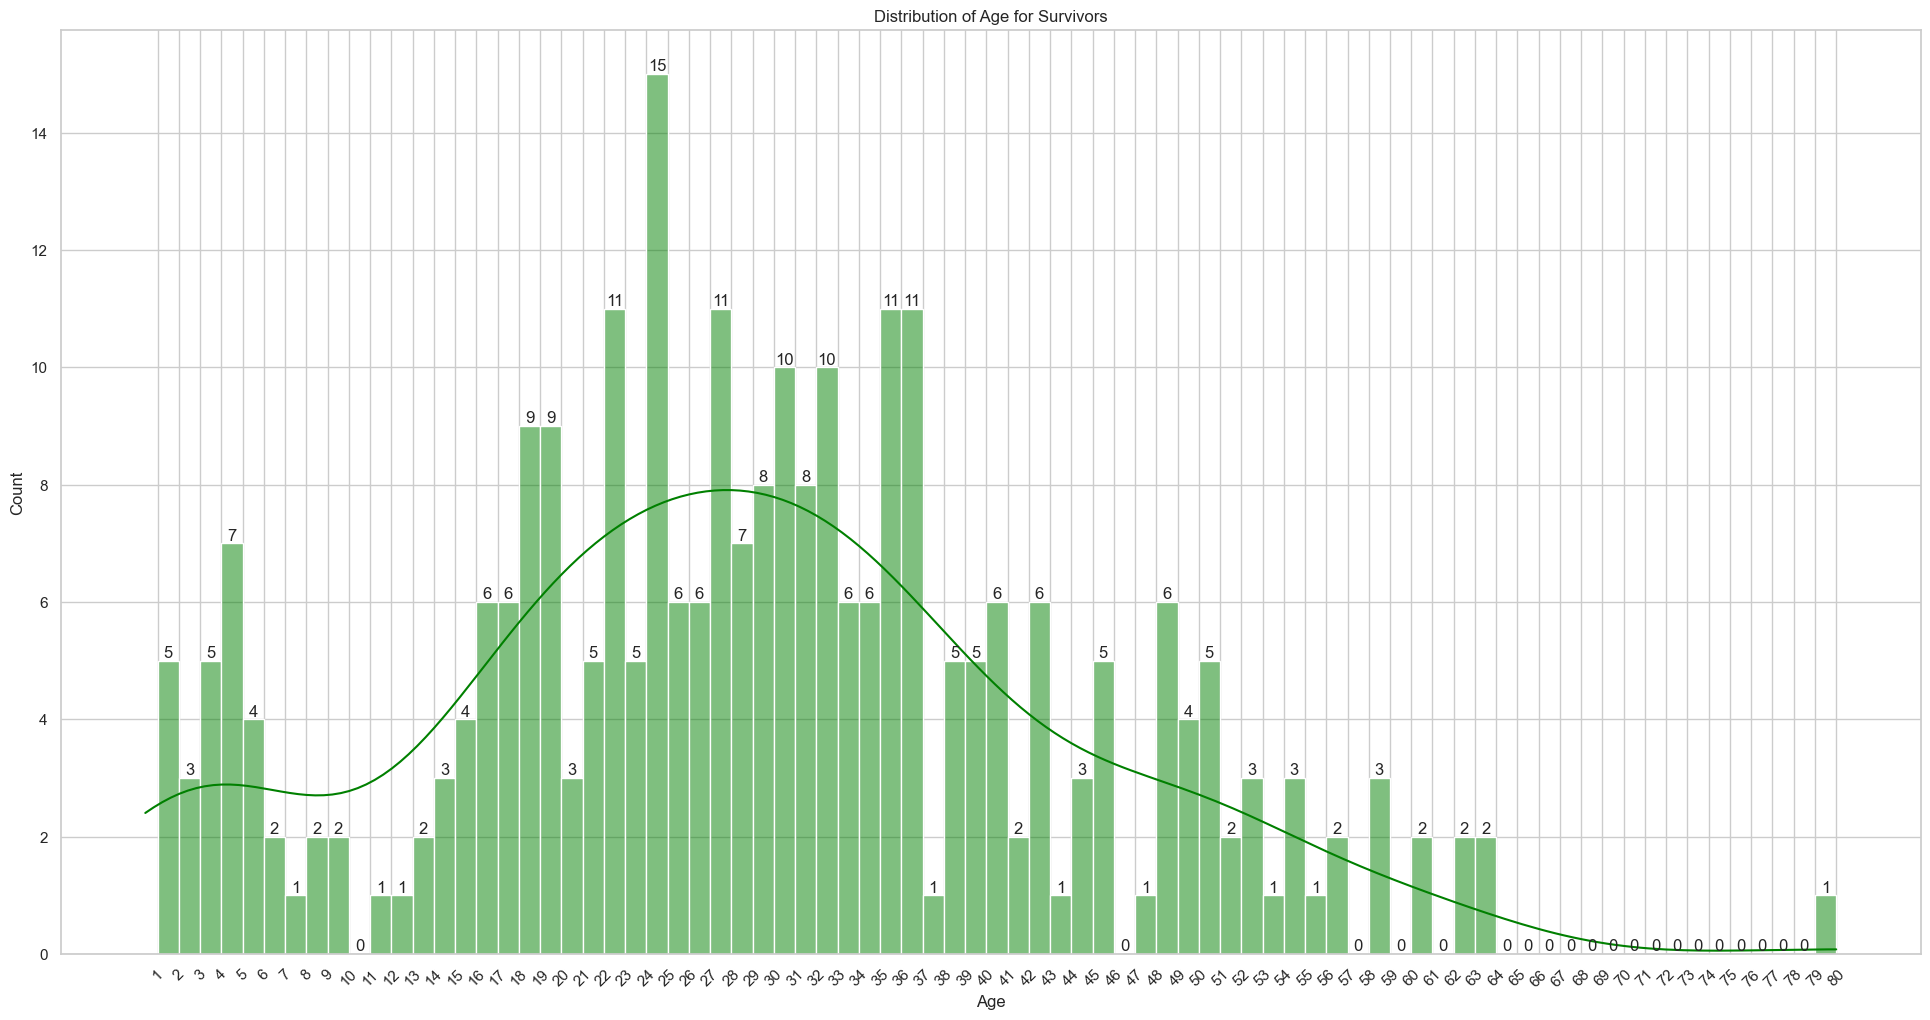

In [10]:
# Set up Seaborn for better visualization
sns.set(style="whitegrid")

# Filter data for only those who survived
survived_data = train_data[train_data['Survived'] == 1]

# Visualize the distribution of 'Age' for the people who survived
plt.figure(figsize=(24, 12))
ax = sns.histplot(survived_data['Age'].dropna(), kde=True, bins=range(1, 81), color='green')
plt.title('Distribution of Age for Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

# Annotate each bin with the exact number
for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Set x-axis ticks to show every individual year and rotate them at a 45-degree angle
plt.xticks(ticks=range(1, 81), rotation=45)

plt.show()


#### Feature engineering and Data Preprocessing


C:\Users\ahish\AppData\Local\Temp\ipykernel_29472\2279500312.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
C:\Users\ahish\AppData\Local\Temp\ipykernel_29472\2279500312.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

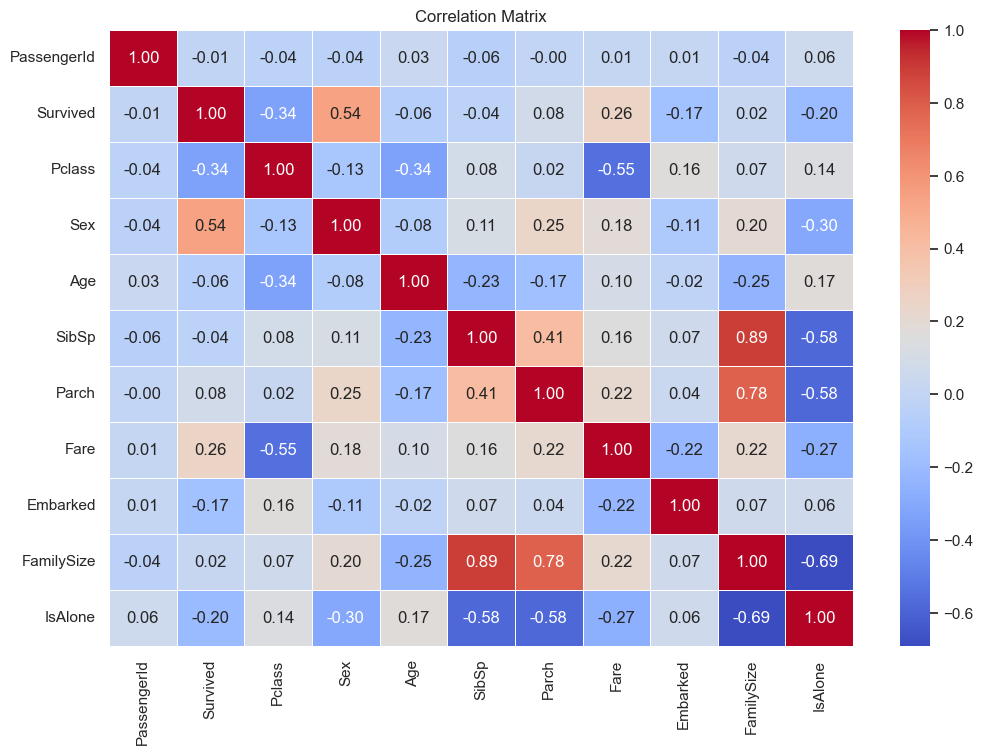

In [11]:
# Feature Engineering
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train_data['Title'] = train_data['Title'].apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Other')

# Handle Missing Values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

# Create New Features
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

# Convert Categorical Features
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Binning 'Age'
bins = [0, 18, 35, 50, 100]
labels = ['0-18', '19-35', '36-50', '51+']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

# Feature Scaling
scaler = StandardScaler()
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

# Combine Sparse Categories
train_data['Title'] = train_data['Title'].apply(lambda x: x if x in ['Mr', 'Miss', 'Mrs', 'Master'] else 'Other')

# Explore Correlations
numeric_columns = train_data.select_dtypes(include=[np.number]).columns
correlation_matrix = train_data[numeric_columns].corr()

# Display Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Handling Outliers
# Example: Clip 'Fare' at 99th percentile
fare_threshold = train_data['Fare'].quantile(0.99)
train_data['Fare'] = np.clip(train_data['Fare'], a_min=None, a_max=fare_threshold)



#### Modelling (Random Forest)

In [12]:
# Apply label encoding to 'Sex' and 'Embarked' in the test data
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select features for test data
# X_test = test_data[features]


# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_data[features]
y_train = train_data['Survived']



# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Use only selected features in the test data
test_data = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Build a RandomForestClassifier
model=RandomForestClassifier(criterion='gini', n_estimators=700,min_samples_split=10,min_samples_leaf=1,oob_score=True,random_state=1,n_jobs=-1,bootstrap = True).fit(X_train,y_train)

# Make predictions on the validation set
y_pred = model.predict(X_valid)

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred)
classification_rep = classification_report(y_valid, y_pred)

print(f'Model Accuracy: {accuracy:.4%}\n')
print('Classification Report:\n', classification_rep)




Model Accuracy: 81.0056%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

